SuperMarket Sales Data Analysis - version 2

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing NaN values
import missingno as msno

# Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Calendar
import calendar

# Geocode
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import folium
from folium import plugins
import ipywidgets
from branca.element import Figure

In [2]:
# Plotly Options and Config

pio.templates.default = 'plotly_white'
config = {'displayModeBar': False}
colors_x = ['#E0C95A', '#CBE0CA', '#E0864E', '#CDCCE3', '#E3B8D1']
cmaps = 'Blues'

In [3]:
df = pd.read_csv('E:/AMotefaker/ABC/Data Analyst/Sales Data Analysis/SuperMarket Sales Data Analysis/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Location of the branches

In [4]:
city_data = df.City.unique()
cities = pd.DataFrame(data = city_data, columns = {'city_name'})
cities

nom = Nominatim(user_agent='Kaggle')

def geo_cities(cities):
    lat = []
    long = []
    flag = 0
    for city in cities['city_name']:
      location = nom.geocode(city)
      try:
        lat.append(location.latitude)
        long.append(location.longitude)
        print(flag)
      except:
        lat.append('NA')
        long.append('NA')
      flag += 1
    cities['Latitude'] = lat
    cities['Longitude'] = long 
    
#geo_cities(cities)
# The geocoding doesn't seem to work in  kaggle notebook so i'll manually add  the output here.

cities = pd.DataFrame({'city_name': ['Yangon', 'Naypyitaw', 'Mandalay'],
                       'Latitude': [16.79671316,19.690708,21.981275],
                       'Longitude' : [96.160992, 96.165883, 96.082375]})

supermarket_geo = folium.Map(location = [19.680708,	96.265883], zoom_start = 7, tiles = 'CartoDB Positron', control_scale = True)

fig = Figure(width = 800, height = 600)
fig.add_child(supermarket_geo)

for (index, row) in cities.iterrows():
  folium.Marker(location = [row.loc['Latitude'], row.loc['Longitude']], popup = row.loc['city_name'],tooltip = 'click',
                icon = folium.Icon(icon = 'glyphicon-shopping-cart', prefix = 'glyphicon')).add_to(supermarket_geo)

#supermarket_geo - Delete # to see the map

#### Variable transformations

Change the date variable to date

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['weekday'] = df['Date'].dt.day_name()

Set the Date as the index of the dataset

In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


#### Univariate Analysis

What does the customer rating look like and is it skewed?

C:\Users\Yepco\AppData\Local\Temp\ipykernel_23300\2669265483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


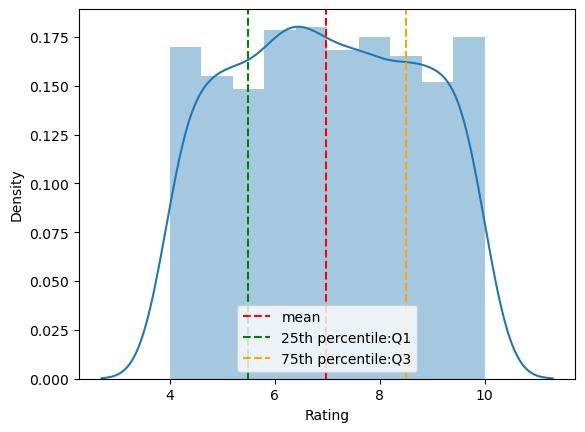

In [9]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

Is there any difference in aggregate sales across branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

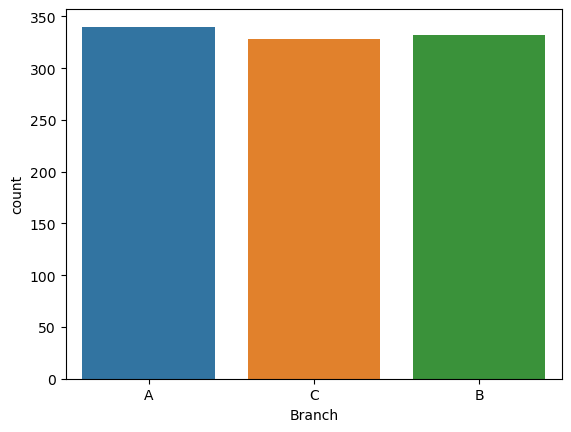

In [10]:
sns.countplot(x=df["Branch"])

In [11]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

Which is the most pouplar payment method used by customers?

<AxesSubplot:xlabel='Payment', ylabel='count'>

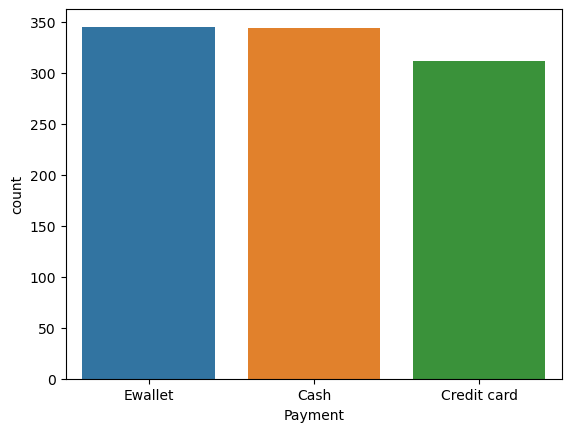

In [12]:
sns.countplot(x=df["Payment"])

#### Bi-variate analysis(Bivariate analysis)

Does gross income affect the ratings that the customers provide?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

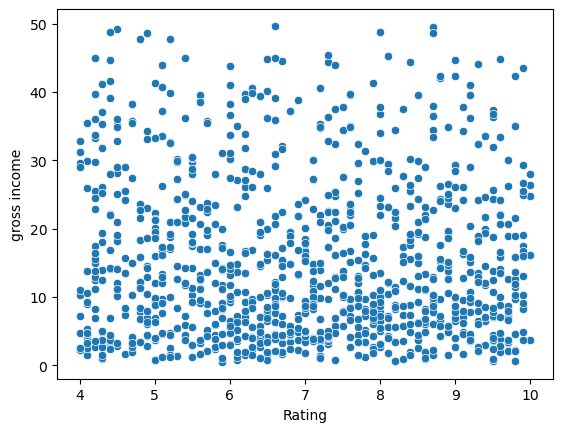

In [13]:
sns.scatterplot(x=df["Rating"], y=df["gross income"])

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

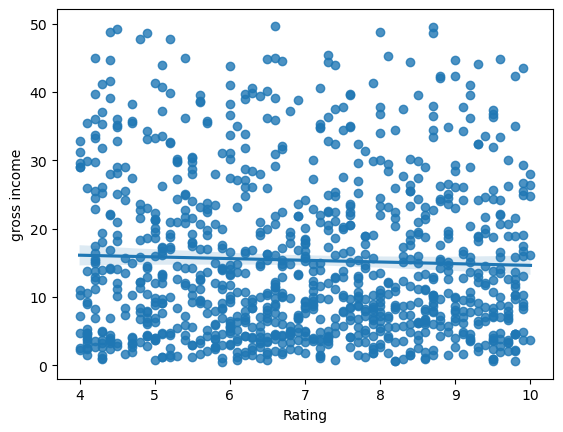

In [14]:
sns.regplot(x=df["Rating"], y=df["gross income"])

Which branch is the most profitable?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

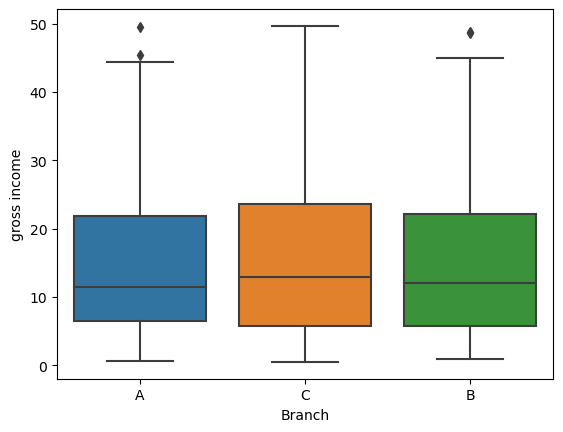

In [15]:
sns.boxplot(x=df["Branch"], y=df["gross income"])

What is the relationship between Gender and Gross income?

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

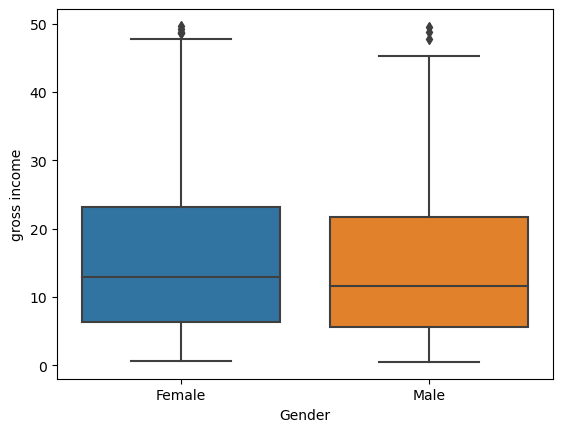

In [16]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

Is there any time trend in gross income?

In [17]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.750000,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


<AxesSubplot:xlabel='Date', ylabel='gross income'>

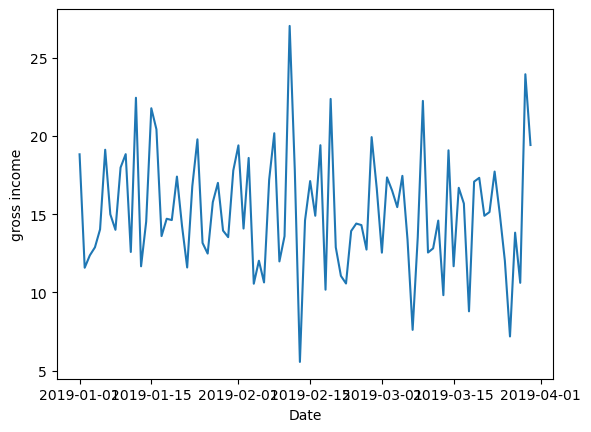

In [18]:
sns.lineplot(x= df.groupby(df.index).mean().index, 
             y = df.groupby(df.index).mean()['gross income'])

Which product line generates most income?

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

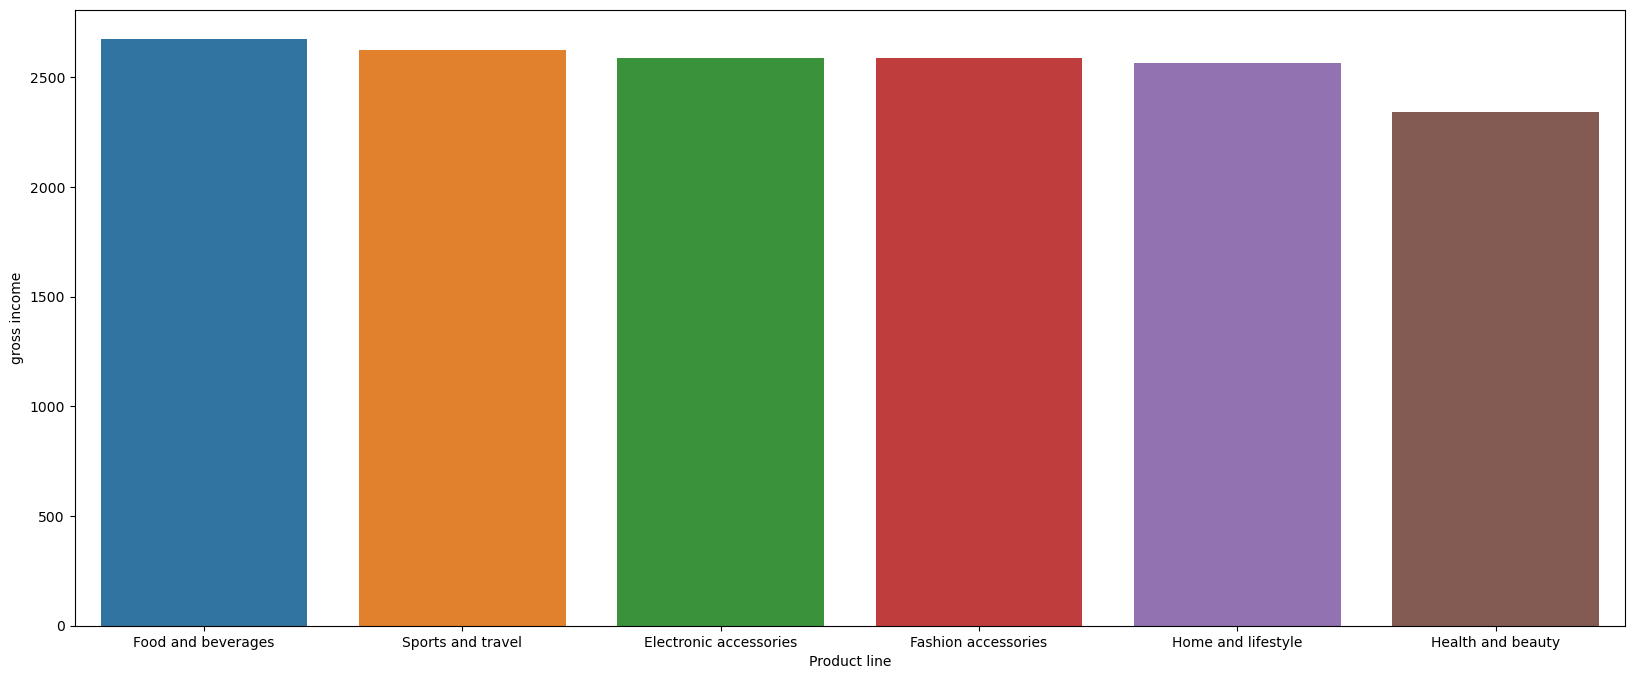

In [19]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

#### Correlation Analysis

Individual Correlations

In [20]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04